In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import utils
from tqdm import tqdm

from scipy import stats

In [2]:
STARTING_CAPITAL = 10_000

data = pd.read_excel("FTSEMIB_tickers.xlsx").sort_values(by='ticker', ignore_index=True)
display(data)

,ticker,name,sector
0,A2A.MI,A2a,public_services
1,AMP.MI,Amplifon,health
2,AZM.MI,Azimut,financial_services
3,BAMI.MI,Banco Bpm,bank
4,BC.MI,Brunello Cucinelli,consumer_market
5,BMED.MI,Banca Mediolanum,financial_services
6,BMPS.MI,Banca Monte Paschi Siena,bank
7,BPE.MI,Bper Banca,bank
8,BPSO.MI,Banca Pop Sondrio,bank
9,CPR.MI,Campari,food


# Download stocks data

In [3]:
ftsemib_data = yf.download(list(data["ticker"])).loc[:'2024-04-20']

[*********************100%%**********************]  40 of 40 completed


In [4]:
def compute_period_return(prices):
    initial_price = prices.iloc[0]
    final_price = prices.iloc[-1]
    return ((final_price - initial_price) / initial_price)

In [5]:
periods = [
    'one-year',
    'six-months',
    'three-months',
    'one-month',
]
columns = [
    'last close price',
    'momentum score',
    'number of shares to buy',
    'stock position'
]
for period in periods:
    columns.append(period + ' return')
    columns.append(period + ' percentile score')
    
for column in columns:
    data[column] = np.nan
    
data.set_index("ticker", inplace=True)
display(data.head())

,name,sector,last close price,momentum score,number of shares to buy,stock position,one-year return,one-year percentile score,six-months return,six-months percentile score,three-months return,three-months percentile score,one-month return,one-month percentile score
ticker,,,,,,,,,,,,,,
A2A.MI,A2a,public_services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMP.MI,Amplifon,health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZM.MI,Azimut,financial_services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAMI.MI,Banco Bpm,bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC.MI,Brunello Cucinelli,consumer_market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data['one-year return'] = compute_period_return(ftsemib_data['Adj Close'].iloc[-252:])
data['six-months return'] = compute_period_return(ftsemib_data['Adj Close'].iloc[-126:])
data['three-months return'] = compute_period_return(ftsemib_data['Adj Close'].iloc[-63:])
data['one-month return'] = compute_period_return(ftsemib_data['Adj Close'].iloc[-21:])
data['last close price'] = ftsemib_data['Close'].iloc[-1]
display(data.head())

,name,sector,last close price,momentum score,number of shares to buy,stock position,one-year return,one-year percentile score,six-months return,six-months percentile score,three-months return,three-months percentile score,one-month return,one-month percentile score
ticker,,,,,,,,,,,,,,
A2A.MI,A2a,public_services,1.729500,NaN,NaN,NaN,0.158907,NaN,0.027935,NaN,-0.040499,NaN,0.053610,NaN
AMP.MI,Amplifon,health,31.340000,NaN,NaN,NaN,-0.043346,NaN,0.150514,NaN,0.058069,NaN,-0.031820,NaN
AZM.MI,Azimut,financial_services,24.010000,NaN,NaN,NaN,0.263631,NaN,0.221572,NaN,-0.056211,NaN,-0.022792,NaN
BAMI.MI,Banco Bpm,bank,6.390000,NaN,NaN,NaN,0.609977,NaN,0.361893,NaN,0.304082,NaN,0.066422,NaN
BC.MI,Brunello Cucinelli,consumer_market,97.150002,NaN,NaN,NaN,0.079077,NaN,0.293609,NaN,0.144962,NaN,-0.086077,NaN


# Compute Percentile scores and momentum score

In [7]:
for stock in data.index:
    scores = []
    for period in periods:
        return_col = period + ' return'
        score_col = period + ' percentile score'
        # Compute score
        score = stats.percentileofscore(data[return_col], data[return_col].loc[stock], nan_policy='omit')
        # Add score
        data.loc[stock, score_col] = score
        scores.append(score)
    data.loc[stock, 'momentum score'] = np.mean(scores)
display(data.head())

,name,sector,last close price,momentum score,number of shares to buy,stock position,one-year return,one-year percentile score,six-months return,six-months percentile score,three-months return,three-months percentile score,one-month return,one-month percentile score
ticker,,,,,,,,,,,,,,
A2A.MI,A2a,public_services,1.729500,45.000,NaN,NaN,0.158907,42.5,0.027935,20.0,-0.040499,30.0,0.053610,87.5
AMP.MI,Amplifon,health,31.340000,33.750,NaN,NaN,-0.043346,27.5,0.150514,40.0,0.058069,40.0,-0.031820,27.5
AZM.MI,Azimut,financial_services,24.010000,40.000,NaN,NaN,0.263631,52.5,0.221572,45.0,-0.056211,22.5,-0.022792,40.0
BAMI.MI,Banco Bpm,bank,6.390000,83.125,NaN,NaN,0.609977,80.0,0.361893,70.0,0.304082,85.0,0.066422,97.5
BC.MI,Brunello Cucinelli,consumer_market,97.150002,42.500,NaN,NaN,0.079077,40.0,0.293609,55.0,0.144962,65.0,-0.086077,10.0


# Select top 20 according to momentum score

In [8]:
portfolio = data.sort_values(by='momentum score', ascending=False).iloc[:20]
display(portfolio)
portfolio_data = yf.download(list(portfolio.index))

,name,sector,last close price,momentum score,number of shares to buy,stock position,one-year return,one-year percentile score,six-months return,six-months percentile score,three-months return,three-months percentile score,one-month return,one-month percentile score
ticker,,,,,,,,,,,,,,
UNI.MI,Unipol,insurance,8.240000,96.250,NaN,NaN,0.754248,90.0,0.627815,97.5,0.479885,97.5,0.079099,100.0
SPM.MI,Saipem,energy,2.240000,91.250,NaN,NaN,0.659259,85.0,0.546427,87.5,0.558803,100.0,0.062115,92.5
UCG.MI,Unicredit,bank,35.275002,90.625,NaN,NaN,0.921924,97.5,0.594350,95.0,0.328625,90.0,0.040254,80.0
BPE.MI,Bper Banca,bank,4.411000,85.625,NaN,NaN,0.688428,87.5,0.542308,85.0,0.335857,92.5,0.036663,77.5
BAMI.MI,Banco Bpm,bank,6.390000,83.125,NaN,NaN,0.609977,80.0,0.361893,70.0,0.304082,85.0,0.066422,97.5
LDO.MI,Leonardo,industrial,21.680000,78.750,NaN,NaN,1.014089,100.0,0.563650,92.5,0.313939,87.5,-0.024302,35.0
BPSO.MI,Banca Pop Sondrio,bank,7.170000,78.750,NaN,NaN,0.812695,92.5,0.421209,77.5,0.123824,55.0,0.055188,90.0
ISP.MI,Intesa Sanpaolo,bank,3.377000,75.625,NaN,NaN,0.506143,75.0,0.522361,82.5,0.220015,70.0,0.032406,75.0
BMPS.MI,Banca Monte Paschi Siena,bank,4.163000,74.375,NaN,NaN,0.883710,95.0,0.754320,100.0,0.288057,82.5,-0.043428,20.0


[*********************100%%**********************]  20 of 20 completed


In [9]:
def get_number_of_shares_to_buy(date: str | pd.Timestamp, capital: float, portfolio_data: pd.DataFrame):
    n_stocks = len(portfolio_data["Close"].columns)
    return  ((capital / n_stocks) / portfolio_data["Close"].loc[date:].iloc[0]) // 1 

In [10]:
portfolio['number of shares to buy'] = get_number_of_shares_to_buy(portfolio_data.index[-1], STARTING_CAPITAL, portfolio_data)
portfolio['stock position'] = portfolio['last close price'] * portfolio['number of shares to buy']

In [11]:
display(portfolio)

,name,sector,last close price,momentum score,number of shares to buy,stock position,one-year return,one-year percentile score,six-months return,six-months percentile score,three-months return,three-months percentile score,one-month return,one-month percentile score
ticker,,,,,,,,,,,,,,
UNI.MI,Unipol,insurance,8.240000,96.250,60.0,494.399986,0.754248,90.0,0.627815,97.5,0.479885,97.5,0.079099,100.0
SPM.MI,Saipem,energy,2.240000,91.250,223.0,499.520002,0.659259,85.0,0.546427,87.5,0.558803,100.0,0.062115,92.5
UCG.MI,Unicredit,bank,35.275002,90.625,14.0,493.850021,0.921924,97.5,0.594350,95.0,0.328625,90.0,0.040254,80.0
BPE.MI,Bper Banca,bank,4.411000,85.625,113.0,498.442975,0.688428,87.5,0.542308,85.0,0.335857,92.5,0.036663,77.5
BAMI.MI,Banco Bpm,bank,6.390000,83.125,78.0,498.419990,0.609977,80.0,0.361893,70.0,0.304082,85.0,0.066422,97.5
LDO.MI,Leonardo,industrial,21.680000,78.750,23.0,498.640007,1.014089,100.0,0.563650,92.5,0.313939,87.5,-0.024302,35.0
BPSO.MI,Banca Pop Sondrio,bank,7.170000,78.750,69.0,494.730005,0.812695,92.5,0.421209,77.5,0.123824,55.0,0.055188,90.0
ISP.MI,Intesa Sanpaolo,bank,3.377000,75.625,148.0,499.796014,0.506143,75.0,0.522361,82.5,0.220015,70.0,0.032406,75.0
BMPS.MI,Banca Monte Paschi Siena,bank,4.163000,74.375,120.0,499.560013,0.883710,95.0,0.754320,100.0,0.288057,82.5,-0.043428,20.0


# Strategy simulation from 2018

In [66]:
def compute_period_return(prices):
    initial_price = prices.iloc[0]
    final_price = prices.iloc[-1]
    return (final_price - initial_price) / initial_price

def get_number_of_shares_to_buy(date: str | pd.Timestamp, tickers: list[str], capital: float, exchange_data: pd.DataFrame):
    n_stocks = len(tickers)
    return ((capital / n_stocks) / exchange_data['Close'][tickers].loc[date:].iloc[0]) // 1

def select_stocks(exchange_data: pd.DataFrame, date: str | pd.Timestamp, periods: list[int], n_stocks: int = 20) -> list[str]:
    # Create DataFrame
    total_tickers = list(exchange_data['Close'].columns)
    columns = [
        'momentum score',
    ]
    for period in periods:
        columns.append(f'{period} day return')
    df = pd.DataFrame(index=total_tickers, columns=columns)
    # Compute returns for each period
    for period in periods:
        df[f'{period} day return'] = compute_period_return(exchange_data['Adj Close'].loc[:date].iloc[-period:])
    for ticker in df.index:
        scores = []
        for period in periods:
            score = stats.percentileofscore(df[f'{period} day return'], df[f'{period} day return'].loc[ticker], nan_policy='omit')
            scores.append(score)
        df.loc[ticker, 'momentum score'] = np.mean(scores)
    # Sort df and select stocks
    selected_stocks = df.sort_values(by='momentum score', ascending=False).index[:n_stocks]
    return list(selected_stocks)

In [67]:
ftsemib = pd.read_excel("FTSEMIB_tickers.xlsx").sort_values(by='ticker', ignore_index=True)
ftsemib_data = yf.download(list(ftsemib['ticker']))
ftsemib_data = ftsemib_data[['Close', 'Adj Close']].loc['2016':]

stocks_adj_returns = utils.compute_returns(ftsemib_data['Adj Close'])

[*********************100%%**********************]  40 of 40 completed


In [83]:
starting_day = '2018-01-02'
periods = [252, 126, 63, 21]
rebalance_frequency = 21

days = ftsemib_data.loc[starting_day:].index

# Initialize dataframe
portfolio_cum_ret = pd.DataFrame(index=days, columns=ftsemib_data['Close'].columns)

#Initialize series to keep track cash
available_money = pd.Series(index=days)

# Select stocks
active_stocks = select_stocks(ftsemib_data, starting_day, periods)

# Add first row
row = ftsemib_data["Close"].loc[starting_day:].iloc[0] * get_number_of_shares_to_buy(starting_day, active_stocks, STARTING_CAPITAL, ftsemib_data)
portfolio_cum_ret.loc[starting_day, :] = row

# Update available money
available_money.loc[days[0]] = STARTING_CAPITAL - row.sum()

current_day = days[0]
last_rebalance_day = days[0]

for day in tqdm(days[1:]):
    # Compute cum returns
    stock_returns = stocks_adj_returns.loc[day]
    portfolio_cum_ret.loc[day, :] = portfolio_cum_ret.loc[current_day, :] * (stock_returns + 1)
    available_money.loc[day] = available_money.loc[current_day]
    
    # Handle period change
    if (day - last_rebalance_day).days > rebalance_frequency:
        last_rebalance_day = day
        # Sell all stocks
        available_money.loc[day] = available_money.loc[current_day] + portfolio_cum_ret.loc[day].sum()
        # Select new stocks
        active_stocks = select_stocks(ftsemib_data, day, periods)
        # Buy with equal weight
        row = ftsemib_data["Close"].loc[day:].iloc[0] * get_number_of_shares_to_buy(day, active_stocks, available_money.loc[day], ftsemib_data)
        portfolio_cum_ret.loc[day, :] = row
        available_money[day] = available_money[day] - (row.sum())
        
    # Change current day
    current_day = day

100%|██████████| 1601/1601 [00:05<00:00, 293.26it/s]


In [93]:
momentum_startegy_performance = portfolio_cum_ret.sum(axis=1)

ftsemib = yf.download(tickers="FTSEMIB.MI", progress=False)["Adj Close"].loc["2018":]
benchmark = (ftsemib / ftsemib.iloc[0]) * STARTING_CAPITAL

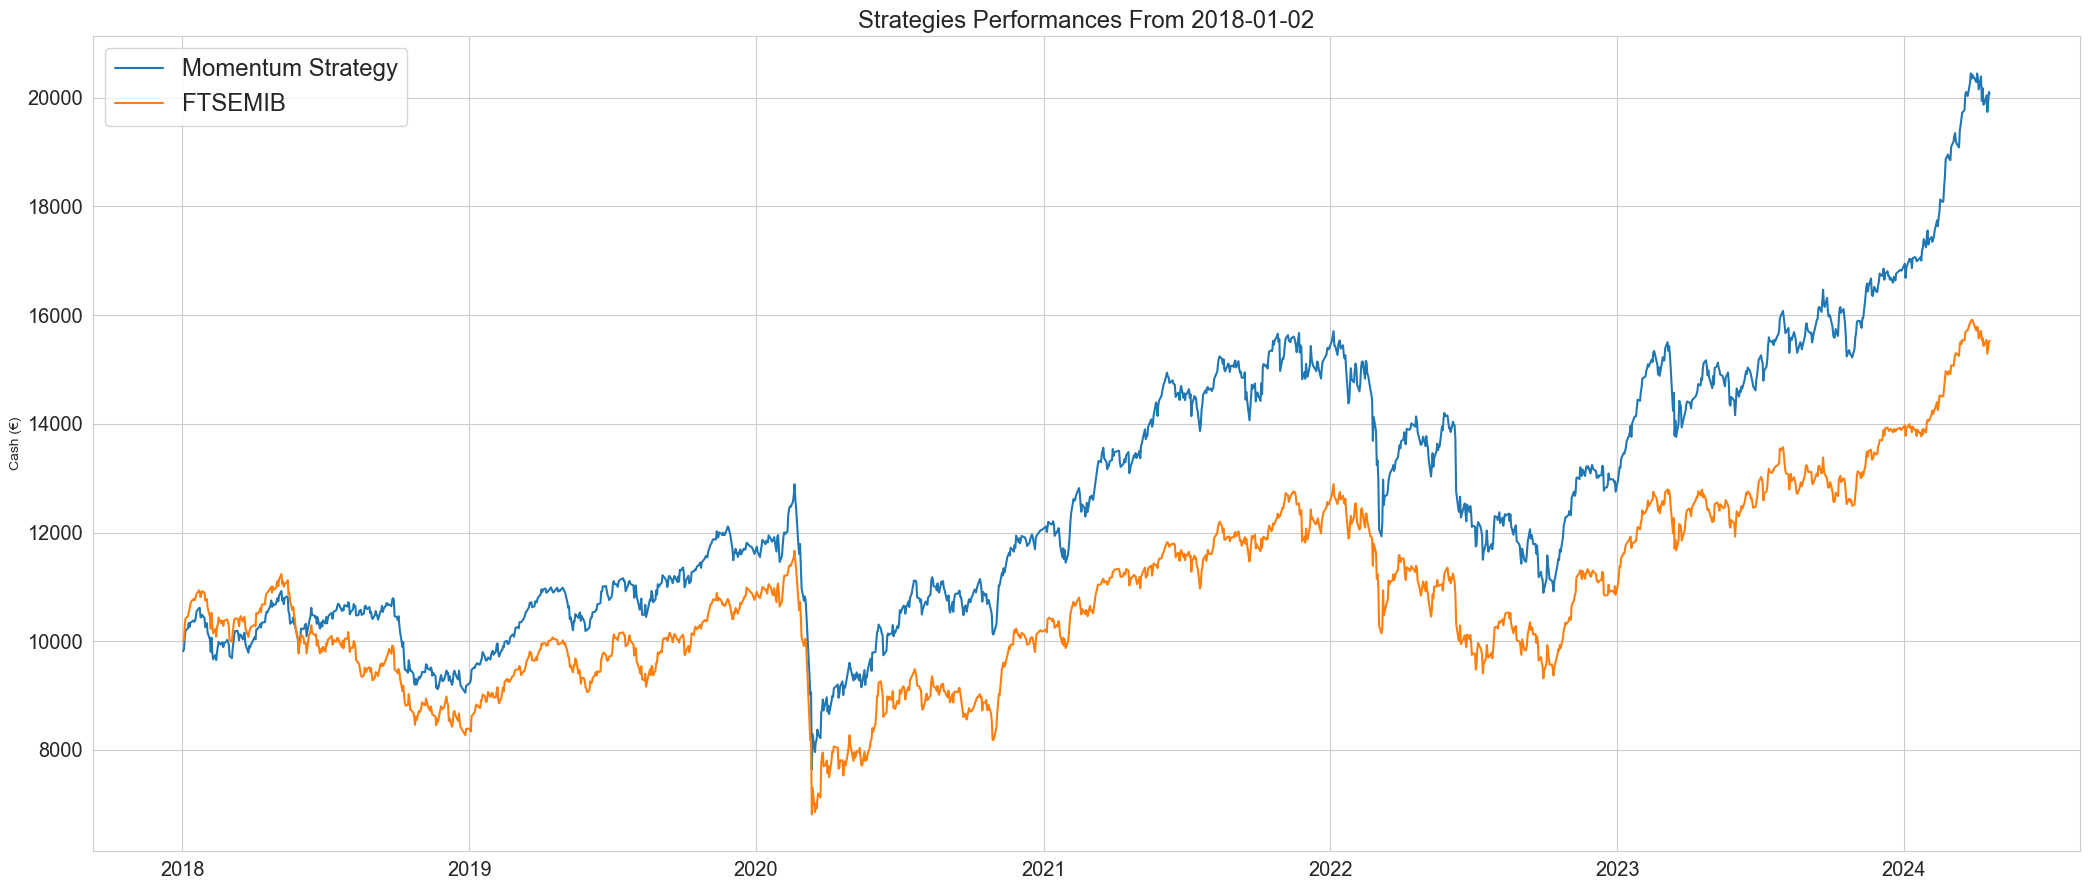

In [94]:
fig, ax = plt.subplots(figsize=(21, 9), tight_layout=True)

ax.plot(momentum_startegy_performance, label="Momentum Strategy")
ax.plot(benchmark, label="FTSEMIB")

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.legend(fontsize="xx-large")
ax.set_ylabel("Cash (€)")
ax.set_title("Strategies Performances From " + starting_day, fontsize="xx-large")
plt.show()